# Evaluation of the results from the human surveys

10 items for 5 people = GROUP A

10 items for 5 people = GROUP B

10 items for 5 people = GROUP C

30 items by 15 people = 5 analogies per item = 150 analogies 

In [1]:
# imports
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import collections
import numpy as np
from scipy.stats import spearmanr



## Evaluate Meta Data

In [3]:
# load data files
path = '../../data/human_results/'
#path = '../data/'
file_name = 'EXP_% - Research Study on Analogies (Responses) - Form Responses 1.csv'

counter = 1
meta_data = {}
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:        
            line = line.split(',')
            age = int(line[4])
            gender = line[5]
            region = line[3]
            meta_data[counter] = [age, gender, region]
            counter += 1

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [4]:
# Calculate average age
ages = [entry[0] for entry in meta_data.values()]
average_age = sum(ages) / len(ages)
print(f"Average Age: {average_age:.2f}")

genders = [entry[1] for entry in meta_data.values()]
gender_counts = Counter(genders)
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} participant(s)")

# Regional distribution
regions = [entry[2] for entry in meta_data.values()]
region_counts = Counter(regions)
print("Regional Distribution:")
for region, count in region_counts.items():
    print(f"{region}: {count} participant(s)")

Average Age: 35.54
Gender Distribution:
Male: 14 participant(s)
Female: 8 participant(s)
Other: 1 participant(s)
Prefer not to say: 1 participant(s)
Regional Distribution:
Europe: 13 participant(s)
North America: 6 participant(s)
Africa: 1 participant(s)
Asia/Pacific: 3 participant(s)
Prefer not to say: 1 participant(s)


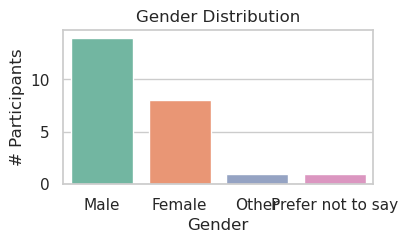

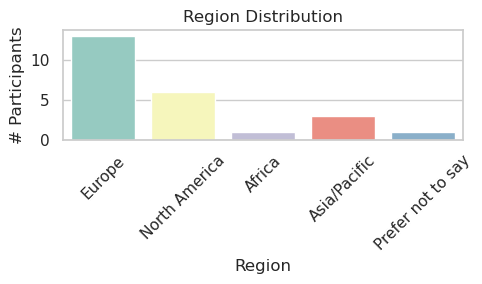

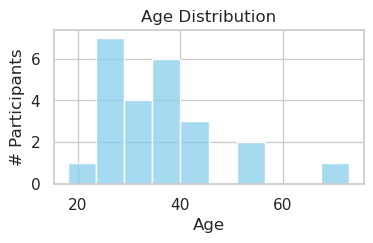

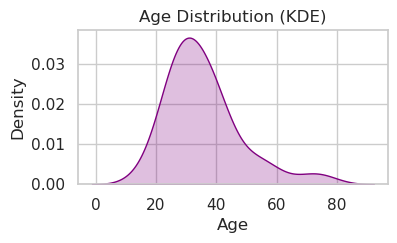

In [6]:
# Extract data
ages = [entry[0] for entry in meta_data.values()]
genders = [entry[1] for entry in meta_data.values()]
regions = [entry[2] for entry in meta_data.values()]

# Set the style
sns.set(style='whitegrid')

# Plot Gender Distribution
plt.figure(figsize=(4, 2))
sns.countplot(x=genders, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('# Participants')
plt.savefig(path+'figures/gender_distr.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Region Distribution
plt.figure(figsize=(5, 3))
sns.countplot(x=regions, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('# Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(path+'figures/region_distr.png', dpi=300,bbox_inches='tight')
plt.show()

# Plot Age Distribution - Histogram
plt.figure(figsize=(4, 2))
sns.histplot(ages, bins=10, color='skyblue', kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('# Participants')
plt.savefig(path+'figures/age_distr.png', dpi=300,bbox_inches='tight')
plt.show()

# Plot Age Distribution - KDE
plt.figure(figsize=(4, 2))
sns.kdeplot(ages, fill=True, color='purple')
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
# save plot in figures folder with 300 dpi
plt.savefig(path+'figures/ageKDE_distr.png', dpi=300,bbox_inches='tight')
plt.show()

## Evaluate Item Data

In [7]:
data_a = {
    "wanted": [[],[]],
    "pulled": [[],[]],
    "increased": [[],[]],
    "impacted": [[],[]],
    "respected": [[],[]],
    "pushed": [[],[]],
    "lifted": [[],[]],
    "owned": [[],[]],
    "argued with": [[],[]],
    "walked": [[],[]]
}

data_b = {
    "fled": [[],[]],
    "pointed at": [[],[]],
    "succeeded": [[],[]],
    "hunted": [[],[]],
    "warned": [[],[]],
    "smashed": [[],[]],
    "perched": [[],[]],
    "bombed": [[],[]],
    "hoped": [[],[]],
    "gave to": [[],[]]
}

data_c = {
    "showed": [[],[]],
    "floated": [[],[]],
    "flew": [[],[]],
    "obeyed": [[],[]],
    "rested": [[],[]],
    "rushed": [[],[]],
    "regretted": [[],[]],
    "sank": [[],[]],
    "offended": [[],[]],
    "tempted": [[],[]]
}

def split_preserve_sentences(line):
    return next(csv.reader([line], skipinitialspace=True))

# load data files
for cond in ["A", "B" ,"C"]:
    file_named = file_name.replace("%", cond)
    print(file_named, " ... read.")
    
    with open(path + file_named, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            line = split_preserve_sentences(line)
            
            if cond == "A":
                incr = 0
                for key in data_a.keys():
                    pos = 7 + incr
                    data_a[key][0].append(line[pos])
                    data_a[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "B":
                incr = 0
                for key in data_b.keys():
                    pos = 7 + incr
                    data_b[key][0].append(line[pos])
                    data_b[key][1].append(line[pos-1])
                    incr += 2
            elif cond == "C":
                incr = 0
                for key in data_c.keys():
                    pos = 7 + incr
                    data_c[key][0].append(line[pos])
                    data_c[key][1].append(line[pos-1])
                    incr += 2
           

EXP_A - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_B - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.
EXP_C - Research Study on Analogies (Responses) - Form Responses 1.csv  ... read.


In [8]:
data = {**data_a, **data_b, **data_c}
print(data.keys())
print(len(data.keys()))

dict_keys(['wanted', 'pulled', 'increased', 'impacted', 'respected', 'pushed', 'lifted', 'owned', 'argued with', 'walked', 'fled', 'pointed at', 'succeeded', 'hunted', 'warned', 'smashed', 'perched', 'bombed', 'hoped', 'gave to', 'showed', 'floated', 'flew', 'obeyed', 'rested', 'rushed', 'regretted', 'sank', 'offended', 'tempted'])
30


In [9]:
overall_counts = collections.Counter()
item_distributions = []
agreement_percentages = []

# Define possible choices
choices = ['A', 'B', 'C', 'D']

# Iterate over each item in data_a
for item_name, lists in data.items():
    choices_list = lists[0]
    item_counts = collections.Counter(choices_list)
    overall_counts.update(choices_list)
    total_responses = len(choices_list)
    most_common_choice, most_common_count = item_counts.most_common(1)[0]
    agreement_percentage = (most_common_count / total_responses) * 100

    agreement_percentages.append({
        'Item': item_name,
        'Most Common Choice': most_common_choice,
        'Agreement Percentage (%)': agreement_percentage
    })
    

    distribution_data = {'Item': item_name}
    for choice in choices:
        distribution_data[choice] = item_counts.get(choice, 0)
    item_distributions.append(distribution_data)

distribution_df = pd.DataFrame(item_distributions).set_index('Item')
agreement_df = pd.DataFrame(agreement_percentages).set_index('Item')

total_responses = sum(overall_counts.values())
overall_distribution = {choice: overall_counts.get(choice, 0) for choice in choices}
overall_distribution_percentages = {choice: (count / total_responses) * 100 for choice, count in overall_distribution.items()}

overall_distribution_df = pd.DataFrame.from_dict(overall_distribution, orient='index', columns=['Count'])
overall_distribution_df['Percentage (%)'] = (overall_distribution_df['Count'] / total_responses) * 100

print("Distribution of Answers for Each Item:")
display(distribution_df)

print("\nOverall Distribution of Answers:")
display(overall_distribution_df)

print("\nAgreement Analysis Per Item:")
display(agreement_df)

Distribution of Answers for Each Item:


,A,B,C,D
Item,,,,
wanted,8,0,0,0
pulled,0,8,0,0
increased,0,0,8,0
impacted,6,0,0,2
respected,2,3,2,1
pushed,8,0,0,0
lifted,0,0,7,1
owned,1,5,0,2
argued with,6,1,0,1



Overall Distribution of Answers:


,Count,Percentage (%)
A,87,36.25
B,45,18.75
C,48,20.00
D,60,25.00



Agreement Analysis Per Item:


,Most Common Choice,Agreement Percentage (%)
Item,,
wanted,A,100.0
pulled,B,100.0
increased,C,100.0
impacted,A,75.0
respected,B,37.5
pushed,A,100.0
lifted,C,87.5
owned,B,62.5
argued with,A,75.0


In [10]:
# create a dictionary from the data in which the key is the item name
# and the value is the list of percentages of each choice

h_percentages = {}
for item_name, lists in data.items():
    choices_list = lists[0]
    item_counts = collections.Counter(choices_list)
    total_responses = len(choices_list)
    h_percentages[item_name] = [(item_counts.get(choice, 0) / total_responses)*100 for choice in choices]

# print the dict
for item_name, percentages in h_percentages.items():
    print(item_name, percentages)

wanted [100.0, 0.0, 0.0, 0.0]
pulled [0.0, 100.0, 0.0, 0.0]
increased [0.0, 0.0, 100.0, 0.0]
impacted [75.0, 0.0, 0.0, 25.0]
respected [25.0, 37.5, 25.0, 12.5]
pushed [100.0, 0.0, 0.0, 0.0]
lifted [0.0, 0.0, 87.5, 12.5]
owned [12.5, 62.5, 0.0, 25.0]
argued with [75.0, 12.5, 0.0, 12.5]
walked [25.0, 50.0, 12.5, 12.5]
fled [0.0, 100.0, 0.0, 0.0]
pointed at [87.5, 0.0, 0.0, 12.5]
succeeded [12.5, 50.0, 37.5, 0.0]
hunted [50.0, 0.0, 0.0, 50.0]
warned [50.0, 0.0, 25.0, 25.0]
smashed [25.0, 0.0, 0.0, 75.0]
perched [12.5, 0.0, 0.0, 87.5]
bombed [0.0, 0.0, 0.0, 100.0]
hoped [50.0, 0.0, 37.5, 12.5]
gave to [87.5, 0.0, 12.5, 0.0]
showed [37.5, 0.0, 25.0, 37.5]
floated [0.0, 12.5, 87.5, 0.0]
flew [37.5, 0.0, 37.5, 25.0]
obeyed [0.0, 62.5, 37.5, 0.0]
rested [37.5, 12.5, 25.0, 25.0]
rushed [62.5, 0.0, 0.0, 37.5]
regretted [25.0, 25.0, 12.5, 37.5]
sank [0.0, 0.0, 0.0, 100.0]
offended [75.0, 12.5, 0.0, 12.5]
tempted [25.0, 25.0, 37.5, 12.5]


In [13]:
# Open the richardson_responses.txt file

with open("../../data/richardson_responses.txt", "r") as f:
    lines = f.readlines()

r_percentages = {}
for line in lines:
    elems = line.split()
    key = " ".join([e for e in elems if e[0].isalpha()])
    r_percentages[key] = [float(e) for e in elems if e[0].isdigit()]

for k, v in r_percentages.items():
    print(k, v)


fled [7.2, 4.2, 80.8, 7.8]
pointed at [7.2, 3.6, 0.0, 89.2]
pulled [6.0, 5.4, 75.4, 13.2]
pushed [7.2, 3.6, 1.2, 88.0]
walked [9.0, 3.6, 24.0, 62.9]
hunted [9.6, 20.4, 1.8, 68.3]
impacted [7.2, 37.1, 3.0, 52.7]
perched [12.0, 76.0, 6.6, 5.4]
showed [15.0, 9.0, 10.2, 65.9]
smashed [3.6, 66.5, 1.2, 28.7]
bombed [4.8, 86.8, 1.8, 6.6]
flew [37.7, 44.3, 15.0, 3.0]
floated [32.9, 56.3, 7.8, 3.0]
lifted [87.4, 9.6, 2.4, 0.6]
sank [22.2, 71.9, 4.2, 1.8]
argued with [11.4, 13.8, 12.6, 62.3]
gave to [8.4, 9.6, 1.2, 80.8]
offended [9.0, 31.7, 24.6, 34.7]
rushed [10.2, 10.8, 23.4, 55.1]
warned [10.8, 22.2, 6.0, 61.1]
owned [5.4, 55.7, 18.6, 20.4]
regretted [19.8, 24.0, 41.3, 15.0]
rested [14.4, 36.5, 40.1, 9.0]
tempted [16.8, 11.4, 45.5, 26.3]
wanted [15.6, 7.8, 15.6, 61.1]
hoped [45.5, 15.6, 7.2, 31.7]
increased [73.7, 7.2, 9.6, 9.0]
obeyed [22.8, 4.2, 64.7, 8.4]
respected [53.9, 3.0, 14.4, 28.7]
succeeded [40.1, 35.9, 10.8, 13.2]


In [14]:
# h_data contains entries of the form:
# RIGHT, LEFT, UP, DOWN
# wanted [1.0, 0.0, 0.0, 0.0]
# pulled [0.0, 1.0, 0.0, 0.0]
# increased [0.0, 0.0, 1.0, 0.0]
# impacted [0.75, 0.0, 0.0, 0.25]

# r_data contains entries of the form:
# UP, DOWN, LEFT, RIGHT
# fled [7.2, 4.2, 80.8, 7.8]
# pointed at [7.2, 3.6, 0.0, 89.2]
# pulled [6.0, 5.4, 75.4, 13.2]
# pushed [7.2, 3.6, 1.2, 88.0]

# We want to compare the two dictionaries and see how similar they are
# but we need to consider that the keys in the two dictionaries are not
# in the same order. We need to sort the keys first, by aligning 
# the h_keys to be in the same order as the r_keys. We do want the ordering
# of the r_keys to be preserved.

h_keys = list(h_percentages.keys())
r_keys = list(r_percentages.keys())

# We can sort the h_keys by the order of the r_keys
h_keys.sort(key=lambda x: r_keys.index(x))

# We also need to swap the columns in the h_data dictionary
# in h_data the columns are RIGHT, LEFT, UP, DOWN
# while in r_data the columns are UP, DOWN, LEFT, RIGHT

# We can do this by creating a new dictionary with the swapped columns
h_percentages_swapped = {}
for k, v in h_percentages.items():
    h_percentages_swapped[k] = [v[2], v[3], v[1], v[0]]
h_percentages = h_percentages_swapped

# Now we can compare the two dictionaries
for h_key, r_key in zip(h_keys, r_keys):
    h_values = h_percentages[h_key]
    r_values = r_percentages[r_key]
    print(h_key, h_values)
    print(r_key, r_values)
    print()

fled [0.0, 0.0, 100.0, 0.0]
fled [7.2, 4.2, 80.8, 7.8]

pointed at [0.0, 12.5, 0.0, 87.5]
pointed at [7.2, 3.6, 0.0, 89.2]

pulled [0.0, 0.0, 100.0, 0.0]
pulled [6.0, 5.4, 75.4, 13.2]

pushed [0.0, 0.0, 0.0, 100.0]
pushed [7.2, 3.6, 1.2, 88.0]

walked [12.5, 12.5, 50.0, 25.0]
walked [9.0, 3.6, 24.0, 62.9]

hunted [0.0, 50.0, 0.0, 50.0]
hunted [9.6, 20.4, 1.8, 68.3]

impacted [0.0, 25.0, 0.0, 75.0]
impacted [7.2, 37.1, 3.0, 52.7]

perched [0.0, 87.5, 0.0, 12.5]
perched [12.0, 76.0, 6.6, 5.4]

showed [25.0, 37.5, 0.0, 37.5]
showed [15.0, 9.0, 10.2, 65.9]

smashed [0.0, 75.0, 0.0, 25.0]
smashed [3.6, 66.5, 1.2, 28.7]

bombed [0.0, 100.0, 0.0, 0.0]
bombed [4.8, 86.8, 1.8, 6.6]

flew [37.5, 25.0, 0.0, 37.5]
flew [37.7, 44.3, 15.0, 3.0]

floated [87.5, 0.0, 12.5, 0.0]
floated [32.9, 56.3, 7.8, 3.0]

lifted [87.5, 12.5, 0.0, 0.0]
lifted [87.4, 9.6, 2.4, 0.6]

sank [0.0, 100.0, 0.0, 0.0]
sank [22.2, 71.9, 4.2, 1.8]

argued with [0.0, 12.5, 12.5, 75.0]
argued with [11.4, 13.8, 12.6, 62.3]

gave

### Notes
- Figure out how to compare them, despite the different response site (+100 vs 8)

In [15]:
import numpy as np
from scipy.spatial.distance import jensenshannon

# Function to compute JS divergence for each word
def compute_js_divergence(h_percentages, r_percentages):
    results = []
    for word in h_percentages.keys():
        # Normalize the percentages to ensure they sum to 1
        h_distribution = np.array(h_percentages[word]) / 100
        r_distribution = np.array(r_percentages[word]) / 100

        # Compute Jensen-Shannon divergence
        js_divergence = jensenshannon(h_distribution, r_distribution, base=2)

        # Store results
        results.append({
            'word': word,
            'js_divergence': js_divergence
        })

    return results



# Run the test
results = compute_js_divergence(h_percentages, r_percentages)

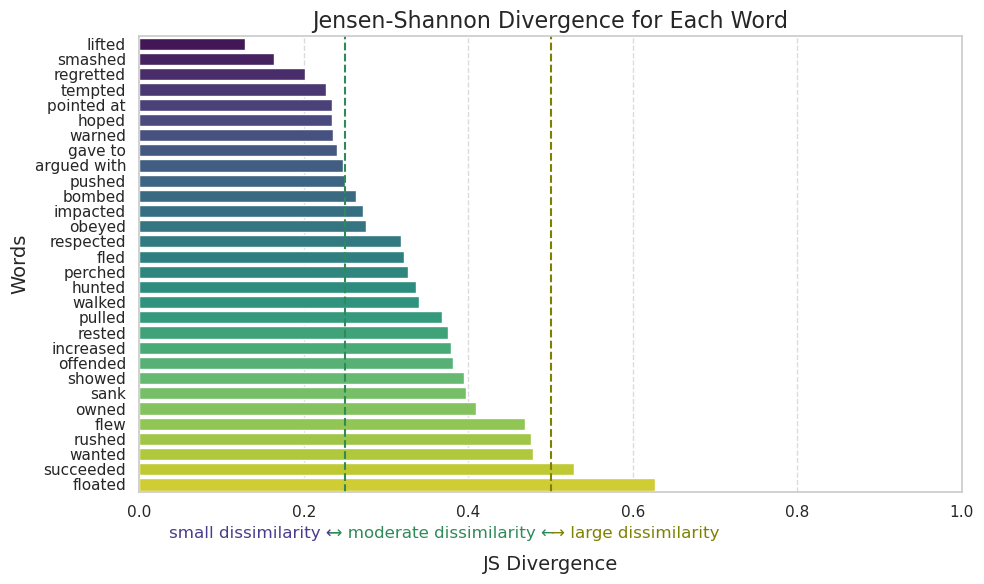

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the results by JS divergence in descending order
results = sorted(results, key=lambda x: x['js_divergence'])

# Function to visualize JS divergence
def visualize_js_divergence(results, xlim=1, name="JS-divergence"):
    # Extract data for plotting
    words = [res['word'] for res in results]
    js_values = [res['js_divergence'] for res in results]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=js_values, y=words, palette="viridis")

    # add dashed vertical line at 0.25 with an x-axis label "small"
    plt.axvline(x=0.25, color='seagreen', linestyle='--')
    # the label is at the bottom below the x-axis
    plt.text(0.25, 32.5, 'small dissimilarity ← ', color='darkslateblue', ha='right')
    plt.text(0.4, 32.5, '  → moderate dissimilarity ←            ', color='seagreen', ha='center')
    
    plt.axvline(x=0.5, color='olive', linestyle='--')
    # the label is at the bottom below the x-axis
    plt.text(0.5, 32.5, '→ large dissimilarity', color='olive', ha='left')
    

    plt.title('Jensen-Shannon Divergence for Each Word', fontsize=16)
   
    plt.xlabel('JS Divergence', fontsize=14, labelpad=25)
    plt.ylabel('Words', fontsize=14)
    plt.xlim(0, xlim)  # JS divergence values range from 0 to 1
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # save the plot in the figures folder with 300 dpi
    plt.savefig(path+'figures/'+name+'.png', dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()

# Example usage
visualize_js_divergence(results, name="JS_divergence_4dim")


In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import f1_score

# Function to compute Spearman correlation and F-score with p-values
def compute_spearman_and_fscore_with_pvalues(h_percentages, r_percentages):
    # Store results
    results = []

    for word in h_percentages.keys():
        # Get distributions for the word
        h_distribution = np.array(h_percentages[word])
        r_distribution = np.array(r_percentages[word])

        # Compute Spearman correlation and p-value
        spearman_corr, spearman_pval = stats.spearmanr(h_distribution, r_distribution)

        # Compute F-Score (using a threshold of 50% to create binary classification)
        h_binary = (h_distribution > 50).astype(int)
        r_binary = (r_distribution > 50).astype(int)
        fscore = f1_score(h_binary, r_binary)

        # Store results in the list
        results.append({
            'word': word,
            'spearman_corr': spearman_corr,
            'spearman_pval': spearman_pval,
            'fscore': fscore
        })

    # Convert the results list into a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Run the analysis
results_df = compute_spearman_and_fscore_with_pvalues(h_percentages, r_percentages)

# use the h_keys to sort the results
results_df = results_df.set_index('word').loc[h_keys].reset_index()

# Display the results in a table
print(results_df)



           word  spearman_corr  spearman_pval  fscore
0          fled       0.774597       0.225403     1.0
1    pointed at       0.632456       0.367544     1.0
2        pulled       0.774597       0.225403     1.0
3        pushed       0.774597       0.225403     1.0
4        walked       0.737865       0.262135     0.0
5        hunted       0.894427       0.105573     0.0
6      impacted       0.948683       0.051317     1.0
7       perched       0.316228       0.683772     1.0
8        showed       0.105409       0.894591     0.0
9       smashed       0.948683       0.051317     1.0
10       bombed       0.774597       0.225403     1.0
11         flew      -0.210819       0.789181     0.0
12      floated       0.105409       0.894591     0.0
13       lifted       0.948683       0.051317     1.0
14         sank       0.774597       0.225403     1.0
15  argued with       0.948683       0.051317     1.0
16      gave to       0.632456       0.367544     1.0
17     offended       0.9486

/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor 

In [18]:
# write the h_percentages into a file that has the format:
# fled 7.2 4.2 80.8 7.8
# pointed at 7.2 3.6 0 89.2
# pulled 6 5.4 75.4 13.2
# use the h_keys to sort the results

with open("../../data/human_actions.txt", "w") as f:
    for key in h_keys:
        f.write(f"{key} {' '.join(map(str, h_percentages[key]))}\n")
        

In [19]:
# add the first two columns of and last two columns of h_percentages together
# do the same for r_percentages

h_percentages_combined = {}
r_percentages_combined = {}

for k, v in h_percentages.items():
    h_percentages_combined[k] = [v[0] + v[1], v[2] + v[3]]

r_percentages_combined = {}
for k, v in r_percentages.items():
    r_percentages_combined[k] = [round(v[0] + v[1], 4), round(v[2] + v[3],4)]
                                 

# Print the combined percentages of humans and richardson for each word
# for each word, first print the percentages of humans, then the percentages of richardson
for k, v in h_percentages_combined.items():
    print(k, v)
    print(k, r_percentages_combined[k])

wanted [0.0, 100.0]
wanted [23.4, 76.7]
pulled [0.0, 100.0]
pulled [11.4, 88.6]
increased [100.0, 0.0]
increased [80.9, 18.6]
impacted [25.0, 75.0]
impacted [44.3, 55.7]
respected [37.5, 62.5]
respected [56.9, 43.1]
pushed [0.0, 100.0]
pushed [10.8, 89.2]
lifted [100.0, 0.0]
lifted [97.0, 3.0]
owned [25.0, 75.0]
owned [61.1, 39.0]
argued with [12.5, 87.5]
argued with [25.2, 74.9]
walked [25.0, 75.0]
walked [12.6, 86.9]
fled [0.0, 100.0]
fled [11.4, 88.6]
pointed at [12.5, 87.5]
pointed at [10.8, 89.2]
succeeded [37.5, 62.5]
succeeded [76.0, 24.0]
hunted [50.0, 50.0]
hunted [30.0, 70.1]
warned [50.0, 50.0]
warned [33.0, 67.1]
smashed [75.0, 25.0]
smashed [70.1, 29.9]
perched [87.5, 12.5]
perched [88.0, 12.0]
bombed [100.0, 0.0]
bombed [91.6, 8.4]
hoped [50.0, 50.0]
hoped [61.1, 38.9]
gave to [12.5, 87.5]
gave to [18.0, 82.0]
showed [62.5, 37.5]
showed [24.0, 76.1]
floated [87.5, 12.5]
floated [89.2, 10.8]
flew [62.5, 37.5]
flew [82.0, 18.0]
obeyed [37.5, 62.5]
obeyed [27.0, 73.1]
rested

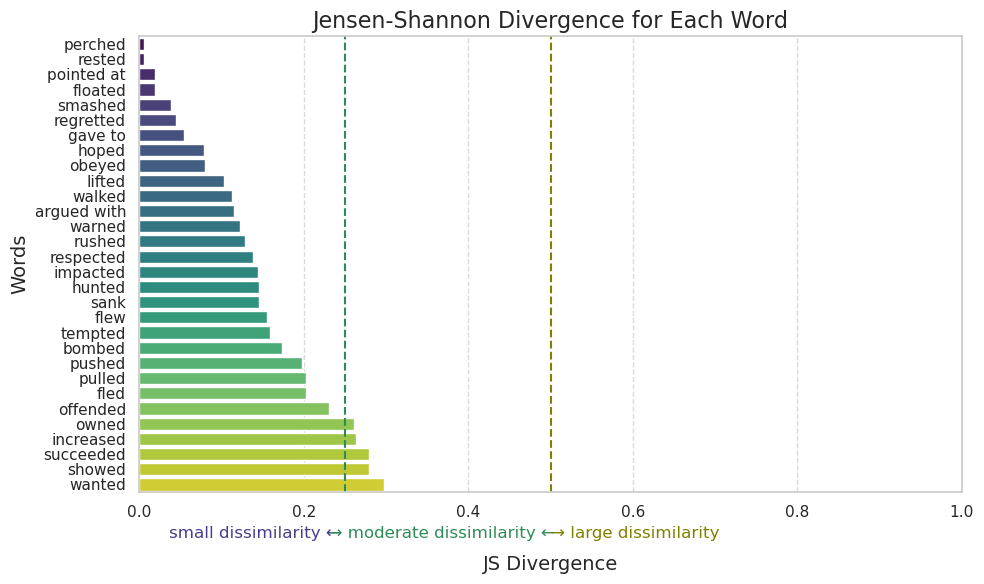

In [20]:
# Write both the combined human and richardson percentages to a dict

data = {}
for k, v in h_percentages_combined.items():
    data[k] = [v, r_percentages_combined[k]]


from scipy.spatial.distance import jensenshannon
import numpy as np

# Function to compute Jensen-Shannon Divergence for each word
def compute_js_divergence(data):
    results = {}
    for word, conditions in data.items():
        # Normalize each condition to sum to 1 (convert to probability distributions)
        condition_a = np.array(conditions[0]) / sum(conditions[0])
        condition_b = np.array(conditions[1]) / sum(conditions[1])

        # Compute Jensen-Shannon Divergence
        js_divergence = jensenshannon(condition_a, condition_b)

        # Store the result
        results[word] = js_divergence
    
    return results

# Calculate JS Divergence for the data
js_results = compute_js_divergence(data)

# Sort the results by JS divergence in descending order
js_results = {k: v for k, v in sorted(js_results.items(), key=lambda item: item[1])}

js_results = [{'word': word, 'js_divergence': js_div} for word, js_div in js_results.items()]

# Visualize the results
visualize_js_divergence(js_results, name="JS_divergence_2dim")

In [21]:
# Create a table that groups all words with small dissimilarity (JS Divergence < 0.25)
small_dissimilarity = [js for js in js_results if js['js_divergence'] < 0.25]
moderate_dissimilarity = [js for js in js_results if 0.25 <= js['js_divergence'] < 0.5]
large_dissimilarity = [js for js in js_results if js['js_divergence'] >= 0.5]

# Create one table with all three categories
js_divergence_df = pd.DataFrame(js_results)

# Add a new column to categorize the JS divergence
js_divergence_df['Dissimilarity Category'] = pd.cut(js_divergence_df['js_divergence'],
                                                    bins=[-np.inf, 0.25, 0.5, np.inf],
                                                    labels=['Small', 'Moderate', 'Large'])

# Display the table
print(js_divergence_df)


           word  js_divergence Dissimilarity Category
0       perched       0.005392                  Small
1        rested       0.006364                  Small
2    pointed at       0.018742                  Small
3       floated       0.018742                  Small
4       smashed       0.038840                  Small
5     regretted       0.044251                  Small
6       gave to       0.054216                  Small
7         hoped       0.079064                  Small
8        obeyed       0.079766                  Small
9        lifted       0.102525                  Small
10       walked       0.112415                  Small
11  argued with       0.115533                  Small
12       warned       0.122573                  Small
13       rushed       0.127996                  Small
14    respected       0.137838                  Small
15     impacted       0.144111                  Small
16       hunted       0.145163                  Small
17         sank       0.1457

In [22]:
# From the original data, extract the words 
# print the words in alphabetical order without
# any other information

words = list(data.keys())
words.sort()
for word in words:
    print(word)


argued with
bombed
fled
flew
floated
gave to
hoped
hunted
impacted
increased
lifted
obeyed
offended
owned
perched
pointed at
pulled
pushed
regretted
respected
rested
rushed
sank
showed
smashed
succeeded
tempted
walked
wanted
warned


In [23]:
# Evaluate spearman correlation and F-score for the combined data
results_df = compute_spearman_and_fscore_with_pvalues(h_percentages_combined, r_percentages_combined)

# use the h_keys to sort the results
results_df = results_df.set_index('word').loc[h_keys].reset_index()

# Display the results in a table
print(results_df)


           word  spearman_corr  spearman_pval  fscore
0          fled            1.0            NaN     1.0
1    pointed at            1.0            NaN     1.0
2        pulled            1.0            NaN     1.0
3        pushed            1.0            NaN     1.0
4        walked            1.0            NaN     1.0
5        hunted            NaN            NaN     0.0
6      impacted            1.0            NaN     1.0
7       perched            1.0            NaN     1.0
8        showed           -1.0            NaN     0.0
9       smashed            1.0            NaN     1.0
10       bombed            1.0            NaN     1.0
11         flew            1.0            NaN     1.0
12      floated            1.0            NaN     1.0
13       lifted            1.0            NaN     1.0
14         sank            1.0            NaN     1.0
15  argued with            1.0            NaN     1.0
16      gave to            1.0            NaN     1.0
17     offended            1

/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_ms

/tmp/ipykernel_2338038/3327378959.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


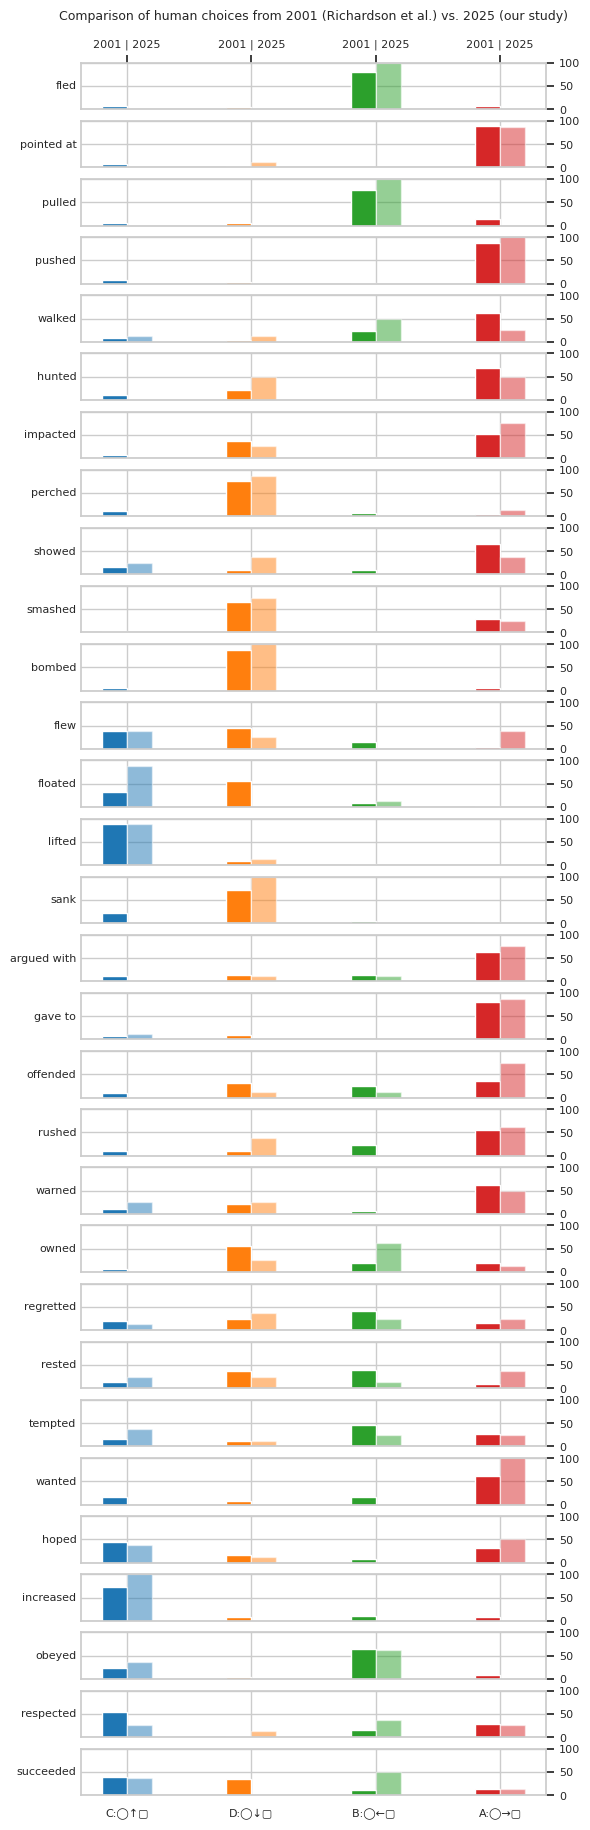

In [24]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Sample data
data_old = r_percentages
data_new = h_percentages

action_names = list(data_old.keys())
num_actions = len(action_names)
num_subplots = len(data_old[action_names[0]])

fig_width = 6
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a GridSpec layout
fig = plt.figure(figsize=(fig_width, .75*num_actions))  # Adjust the height factor as needed
gs = gridspec.GridSpec(num_actions, 1, figure=fig, hspace=0.25)  # You can adjust hspace as needed

bar_width_old = 0.2  # Width of the old bars
bar_width_new = bar_width_old /2  # Width of the new bars

for i, action in enumerate(action_names):

    values_old = data_old[action]
    values_new = data_new[action]
    
    positions_old = np.arange(num_subplots) 
    positions_new = positions_old + bar_width_old  # Shift the new bars to the right
    
    bottom_old = np.zeros(num_subplots)
    bottom_new = np.zeros(num_subplots)
    
    ax = fig.add_subplot(gs[i, 0])
    
    for j, (value_old, value_new) in enumerate(zip(values_old, values_new)):
        color_A = colors[j]

        ax.bar(positions_old[j]-.1, value_old, bottom=bottom_old[j], width=bar_width_old, color=color_A)
        new_bar_x = positions_new[j] #+ bar_width_new / 2  # Middle of the new bar
        ax.bar(positions_new[j]-.1, value_new, bottom=bottom_new[j], width=bar_width_new*2, color=color_A, alpha=0.5)
        
        bottom_old[j] += value_old
        bottom_new[j] += value_new
        

    ax.set_xticks(positions_old)
    ax.set_xticklabels([])
    
    if i == num_actions - 1:
        ax.set_xticklabels(['C:◯↑▢', 'D:◯↓▢', 'B:◯←▢ ', 'A:◯→▢'], fontsize=8)  # Adjust fontsize as needed
    if i == 0 :
        ax.set_xticklabels(["2001 | 2025", "2001 | 2025", "2001 | 2025", "2001 | 2025"], fontsize=8)  # Adjust fontsize as needed
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')
        
    ax.yaxis.tick_right()
    # set ylim to 0 - 100
    ax.set_ylim(0, 100)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_label_position("right")
    
    ax.text(-.01, 0.5, action, transform=ax.transAxes, rotation=0, va='center', ha='right', fontsize=8)

# plt.title('Comparison of Human Choices from 2001 (Richardson et al.) vs. 2025 (our study)', fontsize=12)
# put title at the top of the figure
plt.title('Comparison of human choices from 2001 (Richardson et al.) vs. 2025 (our study)', fontsize=9, y=38)
plt.tight_layout()
plt.savefig(path+'figures/human_choice_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
import math

def calculate_agreement(values):
    """
    Calculate the agreement score for a list of percentages.
    The score is 1 if all the percentage is in one element (complete agreement),
    and it approaches 0 as the distribution becomes more uniform (complete disagreement).
    """
    total = sum(values)
    if total == 0:
        return 0  # Handle edge case where all values are 0

    normalized = [v / total for v in values]
    agreement_score = sum(x ** 2 for x in normalized)
    return agreement_score

def calculate_deviation(scores):
    """
    Calculate the standard deviation for a list of scores.
    """
    mean_score = sum(scores) / len(scores)
    variance = sum((score - mean_score) ** 2 for score in scores) / len(scores)
    return math.sqrt(variance)


# Observation counts
N_h = 8
N_r = 173

h_scores = []
r_scores = []
print("Item-wise Agreement Scores:")
for h_key, r_key in zip(h_keys, r_keys):
    h_values = h_percentages[h_key]
    r_values = r_percentages[r_key]

    h_score = calculate_agreement(h_values)
    r_score = calculate_agreement(r_values)

    h_scores.append(h_score * N_h)  # Weight by N_h
    r_scores.append(r_score * N_r)  # Weight by N_r

    print(f"{h_key} - h: {h_score:.2f}, r: {r_score:.2f}")

# Calculate overall scores as the weighted average of individual scores
overall_h_score = sum(h_scores) / (len(h_scores) * N_h)
overall_r_score = sum(r_scores) / (len(r_scores) * N_r)

# Calculate standard deviations
deviation_h = calculate_deviation([score / N_h for score in h_scores])
deviation_r = calculate_deviation([score / N_r for score in r_scores])

print("\nOverall Agreement Scores:")
print(f"overall - h: {overall_h_score:.2f} (\u00b1{deviation_h:.2f}), r: {overall_r_score:.2f} (\u00b1{deviation_r:.2f})")


Item-wise Agreement Scores:
fled - h: 1.00, r: 0.67
pointed at - h: 0.78, r: 0.80
pulled - h: 1.00, r: 0.59
pushed - h: 1.00, r: 0.78
walked - h: 0.34, r: 0.47
hunted - h: 0.50, r: 0.52
impacted - h: 0.62, r: 0.42
perched - h: 0.78, r: 0.60
showed - h: 0.34, r: 0.47
smashed - h: 0.62, r: 0.53
bombed - h: 1.00, r: 0.76
flew - h: 0.34, r: 0.36
floated - h: 0.78, r: 0.43
lifted - h: 0.78, r: 0.77
sank - h: 1.00, r: 0.57
argued with - h: 0.59, r: 0.44
gave to - h: 0.78, r: 0.67
offended - h: 0.59, r: 0.29
rushed - h: 0.53, r: 0.38
warned - h: 0.38, r: 0.44
owned - h: 0.47, r: 0.39
regretted - h: 0.28, r: 0.29
rested - h: 0.28, r: 0.32
tempted - h: 0.28, r: 0.32
wanted - h: 1.00, r: 0.43
hoped - h: 0.41, r: 0.34
increased - h: 1.00, r: 0.57
obeyed - h: 0.53, r: 0.48
respected - h: 0.28, r: 0.39
succeeded - h: 0.41, r: 0.32

Overall Agreement Scores:
overall - h: 0.62 (±0.26), r: 0.49 (±0.15)
